## TRABALHO PRÁTICO 1

Acumular as leituras por dias e depois agrupar por trimestre.


1 - Coletas realizadas separadas por trimestre:

Trimestre	Volume acumulado
2011/1			233.6
2011/2			216.4
2011/3			82.6
2011/4			191.4
2012/1			238.0
2012/2			155.4
2012/3			179.8
2012/4			438.6
2013/1			332.2
2013/2			264.8
2013/3			280.8
2013/4			332.4
2014/1			289.4
2014/2			351.8
2014/3			264.6
2014/4			399.6
2015/1			258.2
2015/2			260.8
2015/3			317.2
2015/4			580.8
2016/1			313.4
2016/2			167.6
2016/3			193.2
2016/4			466.8
2017/1			404.8
2017/2			371.0
2017/3			285.0
2017/4			274.2
2018/1			290.8
2018/2			132.4
2018/3			293.4
2018/4			355.2
2019/1			271.0
2019/2			259.4
2019/3			194.8
2019/4			405.0
2020/1			227.0
2020/2			201.2
2020/3			157.8
2020/4			30.8

2 - Gráficos do período :



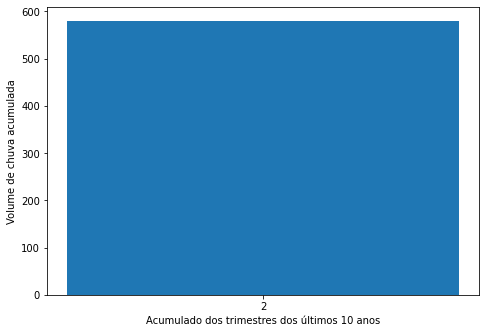


3 - Relatório sobre índice de coletas realizadas e previstas no trimestre:

Trimestre	Coletas realizadas	Coletas previstas	Índice de coletas
2			12890			21672			59.5			%
2			12634			21840			57.8			%
2			12347			22080			55.9			%
2			11863			22080			53.7			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%
2			0			0			nan			%

Foram excluídos da am

C:\Users\aliss\AppData\Local\Temp\ipykernel_20140\969021314.py:108: RuntimeWarning: invalid value encountered in double_scalars
  print(rotulos_trimestres[indice] , int(coleta_realizada), int(coletas_previstas[indice]), round((coleta_realizada / coletas_previstas[indice]) * 100, 1),"%", sep = '\t\t\t')


In [42]:

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

caminho = './'
dataset_orig = 'dataset_reg_chuva_santa_maria_2011_2020_2.csv'

# caminho para o dataset original
dataset_original_coletas = pd.read_csv(caminho + dataset_orig, sep = ';')

# quantidade total de registros coletados
quantidade_registros_coletadas_horas = len(dataset_original_coletas)

# conta quantidade de linhas com valores nulos na coluna de chuva
dados_ausentes_chuva_horas = dataset_original_coletas['CHUVA'].isna().sum()

# apaga as linhas com valores null na coluna CHUVA
dataset_original_coletas['CHUVA'].dropna(inplace = True)
dataset_original_coletas['DT_MEDICAO'].dropna(inplace = True)

# dataset original
dataset_original_coletas.sort_values(by = ['DT_MEDICAO', 'HR_MEDICAO'], inplace = True)
# reseta indice depois de ordenar linhas
dataset_original_coletas.reset_index(drop = True, inplace = True)

# pegando primeira e última data do dataset
todas_datas = dataset_original_coletas['DT_MEDICAO']
data_inicial = todas_datas[0]
data_final = todas_datas[len(dataset_original_coletas) - 1]

# convertendo primeira e última data para formato datetime
data_inicial_date = datetime.strptime(data_inicial, '%Y-%m-%d')
data_final_date = datetime.strptime(data_final, '%Y-%m-%d')

# vetor de datas com o período compreendido
dif_data_final_data_inicial = data_final_date - data_inicial_date
datas_periodo = pd.date_range(data_inicial_date, periods = (dif_data_final_data_inicial.days + 1))

# contando dias previstos no periodo para relatorio exercicio 3
quantidade_registros_esperada_dias = len(datas_periodo) 

# criando dataframe com as datas do período 
leituras = np.zeros(len(datas_periodo), dtype=int)
# criando estrutura dicionario com conjunto de dias e leituras
dt_periodo_previsto_coletas_dias = pd.DataFrame({'DT_MEDICAO' : datas_periodo, 'CHUVA' : leituras})

for linha, coluna in dataset_original_coletas.iterrows():
    dataset_original_coletas.at[linha, 'DT_MEDICAO'] = pd.Timestamp(coluna['DT_MEDICAO'])
    # substitui a virgula como divisor de float pelo ponto
    dataset_original_coletas.at[linha, 'CHUVA'] = float(str(coluna['CHUVA']).replace(',', '.'))

# 1 - Uma tabela com uma coluna contendo todos os trimestres de 2010-2020, a precipitação acumulada no respectivo trimestre;

dataset_original_coletas_trimestre = dataset_original_coletas.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].agg(['count' , 'sum'])
print("\n1 - Coletas realizadas separadas por trimestre:\n")

print("Trimestre", "Volume acumulado", sep = '\t')

leituras_trimestres = np.zeros(40, dtype=float)
rotulos_trimestres = np.zeros(40, dtype=str)
indice = 0
for linha, coluna in dataset_original_coletas_trimestre.iterrows():       
    t = int(int(linha.strftime("%m")) / 3)
    leitura_trimestre = round(coluna['sum'], 2)
    rotulo_trimestre = str(linha.strftime("%Y")) + "/" + str(t)
    leituras_trimestres[indice] = leitura_trimestre
    rotulos_trimestres[indice] = rotulo_trimestre
    print(rotulo_trimestre, leitura_trimestre, sep = '\t\t\t')
        
    indice += 1


# for i in leituras_trimestres:
#     print(trimestres[indice] , round(i, 2), sep = '\t\t')
#     indice += 1

#  2. Um gráfico com a evolução da precipitação que contenha todo o trimestre

print("\n2 - Gráficos do período :\n")

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(rotulos_trimestres, leituras_trimestres)
plt.xlabel("Acumulado dos trimestres dos últimos 10 anos")
plt.ylabel("Volume de chuva acumulada")
plt.show()

# 3 - As observações sobre o número de medidas perdidas (dados faltantes) nos trimestres de 2010-2020.
  
dt_previsto_coletas_trimestre = dt_periodo_previsto_coletas_dias.groupby(pd.Grouper(key='DT_MEDICAO', freq='Q'))['CHUVA'].agg(['count']) 


coletas_realizadas = np.zeros(4, dtype=float)
coletas_previstas = np.zeros(4, dtype=float)

print("\n3 - Relatório sobre índice de coletas realizadas e previstas no trimestre:\n")
print("Trimestre", "Coletas realizadas", "Coletas previstas", "Índice de coletas", sep = '\t')
for linha, coluna in dataset_original_coletas_trimestre.iterrows():
    t = int(int(linha.strftime("%m")) / 3)
    coletas_realizadas[t-1] += coluna['count']
    coletas_previstas[t-1] += dt_previsto_coletas_trimestre.at[linha, 'count'] * 24
    

indice = 0

for coleta_realizada in coletas_realizadas:
    print(trimestres[indice] , int(coleta_realizada), int(coletas_previstas[indice]), round((coleta_realizada / coletas_previstas[indice]) * 100, 1),"%", sep = '\t\t\t')
    indice += 1
 

print("\nForam excluídos da amostra", dados_ausentes_chuva_horas, "registros de chuva por ausência de dados.")
print("Este montante desconsiderado representa",
      round((dados_ausentes_chuva_horas / quantidade_registros_coletadas_horas) * 100, 1), "% dos registros de coletas realizadas e",
      round((dados_ausentes_chuva_horas / (quantidade_registros_esperada_dias * 24)) * 100, 1), "% dos registros previstos.")


print("Em dias são aproximadamente", round((dados_ausentes_chuva_horas / 24), 1),
      "dos", quantidade_registros_esperada_dias, "previstos representando",
      round(((dados_ausentes_chuva_horas / 24) / (quantidade_registros_esperada_dias)) * 100, 1), "% do total.") 
